<a href="https://colab.research.google.com/github/tylerlum/covid19_pocus_ultrasound/blob/master/LIME_Explain_Lung_POCUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LIME Explain Lung POCUS

The purpose of this notebook is to use LIME to explain the predictions from frame-based classification models trained on a COVID lung POCUS dataset.

These file names from the following output directory:

"scripts|evaluate_uncertainty.py__Data-..|data|cross_validation_balanced__Model-models|ensemble_balanced3|validation-fold-2_test-fold-3__Fold-3__MC-True__TTA-False__ENSEMBLE-False__Oct-27-2020_18-02-19"

This requires the following files:
* `last_epoch` - frame-based classification model
* `<img_name>.jpg` - image whose classification we want to explain

In [3]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)
import cv2

Notebook run using keras: 2.4.3


In [4]:
model = keras.models.load_model("last_epoch")

In [215]:
# Hand picked images from test set
# image = cv2.imread("Pneu_liftl_pneu_case3_clip3.mp4_frame0.jpg")
# image = cv2.imread("Cov-Coalescing B lines.mp4_frame0.jpg")
# image = cv2.imread("Reg_alines_advancesVid4.mp4_frame0.jpg")

# Certain and incorrect images
image = cv2.imread("mc_dropout__certain-incorrect__index-84__label-[1 0 0]__uncertainty-0.0691902687061081__l1-loss-0.906338838338852.png")
# image = cv2.imread("mc_dropout__certain-incorrect__index-180__label-[1 0 0]__uncertainty-0.01399976156860364__l1-loss-0.9907586216926575.png")
# image = cv2.imread("mc_dropout__certain-incorrect__index-185__label-[0 1 0]__uncertainty-0.04448785803094582__l1-loss-0.9283356690406799.png")
# image = cv2.imread("mc_dropout__certain-incorrect__index-127__label-[0 0 1]__uncertainty-0.020174342382949104__l1-loss-0.9932182478904724.png")
# image = cv2.imread("mc_dropout__certain-incorrect__index-20__label-[0 0 1]__uncertainty-0.008452541030487913__l1-loss-0.9952394783496856.png")
# image = cv2.imread("mc_dropout__certain-incorrect__index-58__label-[0 0 1]__uncertainty-0.03691961227103745__l1-loss-0.9810117626190186.png")

# Certain and correct images
# image = cv2.imread("mc_dropout__certain-correct__index-21__label-[1 0 0]__uncertainty-0.02249087042797793__l1-loss-0.01452756881713868.png")
# image = cv2.imread("mc_dropout__certain-correct__index-26__label-[1 0 0]__uncertainty-0.021063608159052588__l1-loss-0.009026633501052816.png")
# image = cv2.imread("mc_dropout__certain-correct__index-6__label-[0 1 0]__uncertainty-0.06496651852313849__l1-loss-0.026082087755203265.png")
# image = cv2.imread("mc_dropout__certain-correct__index-0__label-[0 1 0]__uncertainty-0.007189998127695973__l1-loss-0.005185798406600939.png")
# image = cv2.imread("mc_dropout__certain-correct__index-7__label-[0 0 1]__uncertainty-0.00873774073540707__l1-loss-0.0038542127609253463.png")
# image = cv2.imread("mc_dropout__certain-correct__index-5__label-[0 0 1]__uncertainty-0.015318109900374043__l1-loss-0.01686740398406983.png")

# Uncertain images
# image = cv2.imread("mc_dropout__most-uncertain__index-218__label-[1 0 0]__uncertainty-0.11493162844491756__l1-loss-0.6389305627346039.png")
# image = cv2.imread("mc_dropout__most-uncertain__index-149__label-[1 0 0]__uncertainty-0.141019137374305__l1-loss-0.6775126373767852.png")
# image = cv2.imread("mc_dropout__most-uncertain__index-190__label-[0 1 0]__uncertainty-0.15890519701658554__l1-loss-0.26360798537731167.png")
# image = cv2.imread("mc_dropout__most-uncertain__index-208__label-[0 1 0]__uncertainty-0.1501838342272395__l1-loss-0.7401564568281174.png")
# image = cv2.imread("mc_dropout__most-uncertain__index-229__label-[0 0 1]__uncertainty-0.16262208517033447__l1-loss-0.6901898381114006.png")
# image = cv2.imread("mc_dropout__most-uncertain__index-124__label-[0 0 1]__uncertainty-0.1256323441802403__l1-loss-0.24258242070674896.png")


image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
image = image / 255

In [216]:
prediction = model.predict(np.array([image]))

[[0.02424352 0.93062454 0.04513189]]


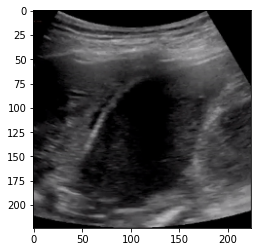

In [217]:
print(prediction)
plt.imshow(image)

In [218]:
!pip install lime

In [219]:
import lime
from lime import lime_image

In [220]:
explainer = lime_image.LimeImageExplainer()

In [221]:
explanation = explainer.explain_instance(image.astype('double'), model.predict, top_labels=5, hide_color=0, num_samples=1000)

In [222]:
from skimage.segmentation import mark_boundaries

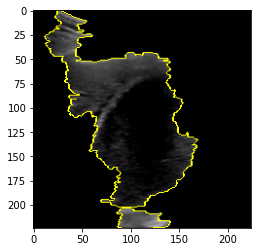

In [223]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))

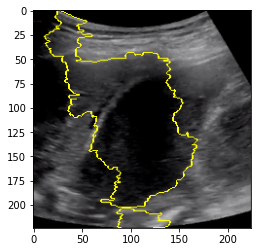

In [224]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

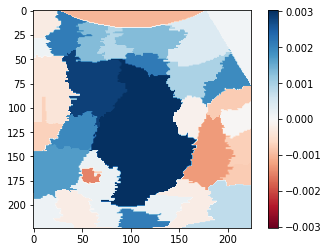

In [225]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()